In [26]:
# import necessary libraries
import numpy as np
import pandas as pd

In [27]:
# import the file
df1 = pd.read_excel(r"C:\Users\ASUS\Desktop\stock_market_review_2025\IPO data\final\IPO_table1.xlsx", )
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Company                323 non-null    object        
 1   Opening Date           323 non-null    datetime64[ns]
 2   Closing Date           323 non-null    datetime64[ns]
 3   Listing Date           323 non-null    datetime64[ns]
 4   Issue Price (Rs.)      323 non-null    object        
 5   Issue Amount (Rs.cr.)  323 non-null    float64       
 6   Listing at             323 non-null    object        
 7   Lead Manager           323 non-null    object        
dtypes: datetime64[ns](3), float64(1), object(4)
memory usage: 20.3+ KB


In [28]:
# import second file
df2 = pd.read_excel(r"C:\Users\ASUS\Desktop\stock_market_review_2025\IPO data\final\ipo-subscription-status-live-bidding-data-bse-nse.xlsx")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company Name   412 non-null    object        
 1   Close Date     412 non-null    datetime64[ns]
 2   Size (Rs Cr)   412 non-null    float64       
 3   QIB (x)        314 non-null    float64       
 4   sNII (x)       102 non-null    float64       
 5   bNII (x)       102 non-null    float64       
 6   NII (x)        410 non-null    float64       
 7   Retail (x)     410 non-null    float64       
 8   Employee (x)   43 non-null     float64       
 9   Others (x)     6 non-null      float64       
 10  Total (x)      412 non-null    float64       
 11  Applications   405 non-null    object        
 12  Mainboard/SME  388 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 42.0+ KB


In [29]:
print(df1.sort_values(by='Company')['Company'].head(3))
print(df2.sort_values(by='Company Name')['Company Name'].head(3))
# Notice that first dataframe has 'IPO' additionally attached to it and that's why there is mismatch of names.

45     3C IT Solutions & Telecoms (India) Limited IPO
25                    ABS Marine Services Limited IPO
203                   ACME Solar Holdings Limited IPO
Name: Company, dtype: object
309    3C IT Solutions & Telecoms (India) Limited
325                   ABS Marine Services Limited
32                    ACME Solar Holdings Limited
Name: Company Name, dtype: object


In [30]:
df1['Company'] = [name.replace(' IPO','') for name in df1['Company']] # replace ' IPO' string with ''
df3 = pd.merge(df1,df2,how='inner', left_on = 'Company', right_on = 'Company Name') # merge the two dataframes
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Company                318 non-null    object        
 1   Opening Date           318 non-null    datetime64[ns]
 2   Closing Date           318 non-null    datetime64[ns]
 3   Listing Date           318 non-null    datetime64[ns]
 4   Issue Price (Rs.)      318 non-null    object        
 5   Issue Amount (Rs.cr.)  318 non-null    float64       
 6   Listing at             318 non-null    object        
 7   Lead Manager           318 non-null    object        
 8   Company Name           318 non-null    object        
 9   Close Date             318 non-null    datetime64[ns]
 10  Size (Rs Cr)           318 non-null    float64       
 11  QIB (x)                242 non-null    float64       
 12  sNII (x)               79 non-null     float64       
 13  bNII 

In [31]:
# drop unnecessary columns
df3.drop(['Opening Date', 'Closing Date', 'Lead Manager', 'Company Name', 'Close Date', 'Size (Rs Cr)', 'sNII (x)', 'bNII (x)', 'Employee (x)','Others (x)'], axis=1, inplace = True) 
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Company                318 non-null    object        
 1   Listing Date           318 non-null    datetime64[ns]
 2   Issue Price (Rs.)      318 non-null    object        
 3   Issue Amount (Rs.cr.)  318 non-null    float64       
 4   Listing at             318 non-null    object        
 5   QIB (x)                242 non-null    float64       
 6   NII (x)                318 non-null    float64       
 7   Retail (x)             318 non-null    float64       
 8   Total (x)              318 non-null    float64       
 9   Applications           315 non-null    object        
 10  Mainboard/SME          317 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 27.5+ KB


In [32]:
# filter the IPOs launched between 01 April 2024 and 31 March 2025
df4 = df3.loc[(df3['Listing Date']>'2024-04-01') & (df3['Listing Date']<'2025-03-31')] 
df4.fillna(0, inplace= True)
df4

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21548\1506114845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.fillna(0, inplace= True)


,Company,Listing Date,Issue Price (Rs.),Issue Amount (Rs.cr.),Listing at,QIB (x),NII (x),Retail (x),Total (x),Applications,Mainboard/SME
0,Bharti Hexacom Limited,2024-04-12,570,4275.00,"BSE, NSE",48.57,10.52,2.83,29.88,"6,19,251",Mainboard
1,DCG Cables & Wires Limited,2024-04-16,100,49.99,NSE SME,0.00,11.53,21.70,16.96,42926,SME
2,Teerth Gopicon Limited,2024-04-16,111,44.40,NSE SME,0.00,97.12,44.33,75.54,70177,SME
3,Greenhitech Ventures Limited,2024-04-22,50,6.30,BSE SME,0.00,921.60,597.41,769.95,"1,63,764",SME
4,Ramdevbaba Solvent Limited,2024-04-23,85,50.27,NSE SME,65.95,314.46,79.96,126.21,97956,SME
...,...,...,...,...,...,...,...,...,...,...,...
299,Divine Hira Jewellers Limited,2025-03-24,90,31.84,NSE SME,0.00,1.20,6.62,3.93,7446,SME
300,Paradeep Parivahan Limited,2025-03-24,98,44.86,BSE SME,1.33,2.65,1.66,1.78,2754,SME
301,Grand Continent Hotels Limited,2025-03-27,113,74.46,NSE SME,2.93,1.39,1.32,1.79,2646,SME
302,Active Infrastructures Limited,2025-03-28,181,77.83,NSE SME,1.00,1.66,0.57,1.05,2061,SME


In [33]:
#import chardet
# with open(r"C:\Users\ASUS\Desktop\stock_market_review_2025\IPO data\final\ipo-performance-report-listing-current-gain (2).csv", "rb") as f:
#     result = chardet.detect(f.read())
# print(result['encoding'])

df5 = pd.read_csv(r"C:\Users\ASUS\Desktop\stock_market_review_2025\IPO data\final\ipo-performance-report-listing-current-gain (2).csv", encoding="ISO-8859-1")
df5 = df5.iloc[:,[0,2,4,5,6,7]] # get the required columns only
df6= pd.read_csv(r"C:\Users\ASUS\Desktop\stock_market_review_2025\IPO data\final\ipo-performance-report-listing-current-gain (3).csv", encoding="ISO-8859-1")
df6 = df6.iloc[:,[0,2,4,5,6,7]] # select the required columns only
df6 = pd.concat([df5,df6])
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 343
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Company                       421 non-null    object
 1   Listing Date                  421 non-null    object
 2   Subscription                  420 non-null    object
 3   Issue Price (Rs.)             421 non-null    object
 4   Close Price on Listing (Rs.)  421 non-null    object
 5   Market Price (Rs.)            421 non-null    object
dtypes: object(6)
memory usage: 23.0+ KB


In [34]:
#df6.loc[df6['Listing Date']=='30-10-2024']
# trying to convert dates (in string format) to datetime format
df6['Listing Date'] = pd.to_datetime(df6['Listing Date'], format="mixed") 
#df6.loc[df6['Company']== 'Godavari Biorefineries Limited']
df6

,Company,Listing Date,Subscription,Issue Price (Rs.),Close Price on Listing (Rs.),Market Price (Rs.)
0,Srigee DLM Limited,2025-12-05,490.93x,Rs 99,Rs 197.50 (99.49%),Rs 228.61 (130.92%)
1,Manoj Jewellers Limited,2025-12-05,1.14x,Rs 54,Rs 53.77 (-0.43%),Rs 48.43 (-10.31%)
2,Kenrik Industries Limited,2025-09-05,2.00x,Rs 25,Rs 26.26 (5.04%),Rs 23.65 (-5.4%)
3,Arunaya Organics Limited,2025-07-05,2.53x,Rs 58,Rs 31.60 (-45.52%),Rs 42.20 (-27.24%)
4,Ather Energy Limited,2025-06-05,1.50x,Rs 321,Rs 302.30 (-5.83%),Rs 303.90 (-5.33%)
...,...,...,...,...,...,...
339,Manoj Ceramic Limited,2024-03-01,9.00x,Rs 62,Rs 77.90 (25.65%),Rs 164.05 (164.6%)
340,HRH Next Services Limited,2024-03-01,66.29x,Rs 36,Rs 43.05 (19.58%),Rs 57.30 (59.17%)
341,Akanksha Power and Infrastructure Limited,2024-03-01,117.39x,Rs 55,Rs 65.10 (18.36%),Rs 94.45 (71.73%)
342,AIK Pipes And Polymers Limited,2024-02-01,43.57x,Rs 89,Rs 105.00 (17.98%),Rs 82.70 (-7.08%)


In [35]:
# filter the rows for given dates
df6 = df6.loc[(df6['Listing Date']>='2024-04-01') & (df6['Listing Date']<= '2025-03-31')]

In [36]:
df = pd.merge(df4,df6, left_on='Company', right_on = 'Company') # merge the two tables df4, df6
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Company                       267 non-null    object        
 1   Listing Date_x                267 non-null    datetime64[ns]
 2   Issue Price (Rs.)_x           267 non-null    object        
 3   Issue Amount (Rs.cr.)         267 non-null    float64       
 4   Listing at                    267 non-null    object        
 5   QIB (x)                       267 non-null    float64       
 6   NII (x)                       267 non-null    float64       
 7   Retail (x)                    267 non-null    float64       
 8   Total (x)                     267 non-null    float64       
 9   Applications                  267 non-null    object        
 10  Mainboard/SME                 267 non-null    object        
 11  Listing Date_y                26

In [37]:
#df.to_csv('IPO_compilation1.csv')

In [38]:
ipo_comp2 = pd.read_csv(r"C:\Users\ASUS\Desktop\stock_market_review_2025\IPO data\final\IPO_compilation2.csv").drop('Unnamed: 0',axis=1)
ipo_comp2

,IPO Name,Mainboard/SME,NSE/BSE,Issue Price,List Price,List Gain(%),Current Price,Current Gain(%)
0,Quality Power Elec...,Mainboard,"NSE, BSE",425.0,432.05,1.66,367.55,-13.520000
1,Hexaware Technolog...,Mainboard,"NSE, BSE",708.0,731.00,3.25,771.75,9.000000
2,Ajax Engineering L...,Mainboard,"NSE, BSE",629.0,593.00,-5.72,671.2,6.710000
3,Dr Agarwal's Healt...,Mainboard,"NSE, BSE",402.0,396.90,-1.27,397.15,-1.210000
4,Denta Water & Infr...,Mainboard,"NSE, BSE",294.0,330.00,12.24,306.65,4.300000
...,...,...,...,...,...,...,...,...
319,Blue Pebble Ltd,SME,NSE,168.0,208.95,18.45,195.0,24.375000
320,Gconnect Logitech ...,SME,BSE,40.0,44.10,5.00,23.55,-41.130000
321,Vruddhi Engineerin...,SME,BSE,70.0,74.55,1.43,161.2,130.290000
322,Naman In-Store (In...,SME,NSE,89.0,118.75,40.45,92.55,33.426966


In [47]:
ipo_comp1 = pd.merge(df['Company'], ipo_comp2['IPO Name'], left_on = 'Company', right_on = 'IPO Name', how = 'right')
ipo_comp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Company   0 non-null      object
 1   IPO Name  324 non-null    object
dtypes: object(2)
memory usage: 5.2+ KB


In [48]:
print(df.sort_values(by='Company').head())
print(ipo_comp2.sort_values(by='IPO Name').head())

                                        Company Listing Date_x  \
43   3C IT Solutions & Telecoms (India) Limited     2024-06-12   
24                  ABS Marine Services Limited     2024-05-21   
181                 ACME Solar Holdings Limited     2024-11-13   
21               Aadhar Housing Finance Limited     2024-05-15   
191                Abha Power and Steel Limited     2024-12-04   

    Issue Price (Rs.)_x  Issue Amount (Rs.cr.) Listing at  QIB (x)  NII (x)  \
43                   52                  11.44    BSE SME     0.00    10.63   
24                  147                  96.29    NSE SME   109.30   270.94   
181                 289                2900.00   BSE, NSE     3.72     1.02   
21                  315                3000.00   BSE, NSE    76.42    17.33   
191                  75                  38.54    NSE SME     0.00    10.07   

     Retail (x)  Total (x) Applications Mainboard/SME Listing Date_y  \
43        29.79      20.21        18722           SME   

In [49]:
df.iloc[1,0]

'DCG Cables & Wires Limited'

In [50]:
ipo_comp2.loc[ipo_comp2['IPO Name']=='DCG Cables & Wires Limited']

,IPO Name,Mainboard/SME,NSE/BSE,Issue Price,List Price,List Gain(%),Current Price,Current Gain(%)


In [51]:
print(ipo_comp1['Company'].sort_values(ascending= True))
print(ipo_comp2['IPO Name'].sort_values())

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
319    NaN
320    NaN
321    NaN
322    NaN
323    NaN
Name: Company, Length: 324, dtype: object
274     3C IT Solutions & ...
30      ACME Solar Holding...
72      AWFIS Space Soluti...
75      Aadhar Housing Fin...
148     Abha Power and Ste...
                ...          
295     Winsol Engineers L...
136     Yash Highvoltage L...
314     Yash Optics & Lens...
278        Z-Tech (India) Ltd
28      Zinka Logistics So...
Name: IPO Name, Length: 324, dtype: object


In [68]:
# Extract first 4 characters to create match_key
df['match_key'] = df['Company'].str.split().str[0].str.lower()
ipo_comp2['match_key'] = ipo_comp2['IPO Name'].str.split().str[0].str.lower()
# Merge based on the match_key
df_merged = pd.merge(df, ipo_comp2, on='match_key', how='inner')

# Drop match_key if not needed
df_merged.drop(columns=['match_key'], inplace=True)

print(df_merged)


                                     Company Listing Date_x  \
0                     Bharti Hexacom Limited     2024-04-12   
1                 DCG Cables & Wires Limited     2024-04-16   
2                     Teerth Gopicon Limited     2024-04-16   
3               Greenhitech Ventures Limited     2024-04-22   
4                 Ramdevbaba Solvent Limited     2024-04-23   
..                                       ...            ...   
272               Paradeep Parivahan Limited     2025-03-24   
273           Grand Continent Hotels Limited     2025-03-27   
274           Active Infrastructures Limited     2025-03-28   
275  Rapid Fleet Management Services Limited     2025-03-28   
276  Rapid Fleet Management Services Limited     2025-03-28   

    Issue Price (Rs.)_x  Issue Amount (Rs.cr.) Listing at  QIB (x)  NII (x)  \
0                   570                4275.00   BSE, NSE    48.57    10.52   
1                   100                  49.99    NSE SME     0.00    11.53   
2     

In [53]:
#df_merged.drop(['Listing Date_x', 'Issue Price (Rs.)_x', 'Listing at', 'Mainboard/SME_x', 'IPO Name'],axis=1,inplace=True)

In [70]:
df_merged[['Company', 'IPO Name', 'Listing Date_x', 'Listing Date_y']].head(20)  # problem with date, problem with first name same but different IPO
#'Issue Price (Rs.)_x', 'Listing at', 'Total (x)', 'Mainboard/SME_x',

,Company,IPO Name,Listing Date_x,Listing Date_y
0,Bharti Hexacom Limited,Bharti Hexacom Ltd,2024-04-12,2024-12-04
1,DCG Cables & Wires Limited,DCG Cables & Wires...,2024-04-16,2024-04-16
2,Teerth Gopicon Limited,Teerth Gopicon Ltd,2024-04-16,2024-04-16
3,Greenhitech Ventures Limited,Greenhitech Ventur...,2024-04-22,2024-04-22
4,Ramdevbaba Solvent Limited,Ramdevbaba Solvent...,2024-04-23,2024-04-23
5,Grill Splendour Services Limited,Grill Splendour Se...,2024-04-23,2024-04-23
6,Faalcon Concepts Limited,Faalcon Concepts L...,2024-04-26,2024-04-26
7,Varyaa Creations Limited,Varyaa Creations L...,2024-04-30,2024-04-30
8,Emmforce Autotech Limited,Emmforce Autotech ...,2024-04-30,2024-04-30
9,JNK India Limited,JNK India Ltd,2024-04-30,2024-04-30


In [72]:
# find the IPOs with mismatch in Mainboard/SME columns
df_merged.loc[df_merged['Mainboard/SME_x'] != df_merged['Mainboard/SME_y']][['Company', 'IPO Name', 'Mainboard/SME_x', 'Mainboard/SME_y']]

,Company,IPO Name,Mainboard/SME_x,Mainboard/SME_y
13,Sai Swami Metals & Alloys Limited,Sai Life Sciences ...,SME,Mainboard
25,Premier Roadlines Limited,Premier Energies L...,SME,Mainboard
132,P N Gadgil Jewellers Limited,P S Raj Steels Ltd,Mainboard,SME
212,Sai Life Sciences Limited,Sai Swami Metals a...,Mainboard,SME


In [74]:
df_merged.loc[(df_merged['Company']=='Sai Swami Metals & Alloys Limited') | ( df_merged['Company']=='Sai Life Sciences Limited') | (df_merged['IPO Name']=='Sai Swami Metals a...	') | (df_merged['Company']=='Sai Life Sciences ...	')][['Company', 'IPO Name', 'Mainboard/SME_x', 'Mainboard/SME_y']]
# delete rows 13, 212; preserve rows 14, 211

,Company,IPO Name,Mainboard/SME_x,Mainboard/SME_y
13,Sai Swami Metals & Alloys Limited,Sai Life Sciences ...,SME,Mainboard
14,Sai Swami Metals & Alloys Limited,Sai Swami Metals a...,SME,SME
211,Sai Life Sciences Limited,Sai Life Sciences ...,Mainboard,Mainboard
212,Sai Life Sciences Limited,Sai Swami Metals a...,Mainboard,SME


In [76]:
df_merged.loc[(df_merged['Company'] == 'Premier Roadlines Limited') | (df_merged['Company'] == 'Premier Energies Limited') | (df_merged['IPO Name'].str.split().str[0].str.lower() == 'premier') ] 
# delete row 25, preserve row 26

,Company,Listing Date_x,Issue Price (Rs.)_x,Issue Amount (Rs.cr.),Listing at,QIB (x),NII (x),Retail (x),Total (x),Applications,...,Close Price on Listing (Rs.),Market Price (Rs.),IPO Name,Mainboard/SME_y,NSE/BSE,Issue Price,List Price,List Gain(%),Current Price,Current Gain(%)
25,Premier Roadlines Limited,2024-05-17,67,40.36,NSE SME,89.95,180.25,106.5,117.57,"1,06,711",...,Rs 91.35 (36.34%),Rs 95.90 (43.13%),Premier Energies L...,Mainboard,"NSE, BSE",450.0,991.00,120.22,1127.15,150.480000
26,Premier Roadlines Limited,2024-05-17,67,40.36,NSE SME,89.95,180.25,106.5,117.57,"1,06,711",...,Rs 91.35 (36.34%),Rs 95.90 (43.13%),Premier Roadlines ...,SME,NSE,67.0,91.35,29.85,100.05,36.343284


In [78]:
df_merged.loc[(df_merged['Company'] == 'P N Gadgil Jewellers Limited') | (df_merged['Company'] == 'P S Raj Steels Limited') | (df_merged['IPO Name']==	'P S Raj Steels Ltd') | (df_merged['IPO Name'] == 'P N Gadgil Jewelle...	')] 
# delete row 132,preserve row 131 

,Company,Listing Date_x,Issue Price (Rs.)_x,Issue Amount (Rs.cr.),Listing at,QIB (x),NII (x),Retail (x),Total (x),Applications,...,Close Price on Listing (Rs.),Market Price (Rs.),IPO Name,Mainboard/SME_y,NSE/BSE,Issue Price,List Price,List Gain(%),Current Price,Current Gain(%)
131,P N Gadgil Jewellers Limited,2024-09-17,480,1100.0,"BSE, NSE",136.85,56.08,16.58,59.41,"39,86,537",...,Rs 793.30 (65.27%),Rs 567.60 (18.25%),P N Gadgil Jewelle...,Mainboard,"NSE, BSE",480.0,834.0,73.75,543.4,13.210000
132,P N Gadgil Jewellers Limited,2024-09-17,480,1100.0,"BSE, NSE",136.85,56.08,16.58,59.41,"39,86,537",...,Rs 793.30 (65.27%),Rs 567.60 (18.25%),P S Raj Steels Ltd,SME,NSE,140.0,150.6,3.57,136.0,7.571429


In [80]:
df_merged = df_merged.drop([13, 25, 132, 212])

In [ ]:
#df_merged.to_csv('IPO_complete_compilation.csv')

In [82]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 0 to 276
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Company                       273 non-null    object        
 1   Listing Date_x                273 non-null    datetime64[ns]
 2   Issue Price (Rs.)_x           273 non-null    object        
 3   Issue Amount (Rs.cr.)         273 non-null    float64       
 4   Listing at                    273 non-null    object        
 5   QIB (x)                       273 non-null    float64       
 6   NII (x)                       273 non-null    float64       
 7   Retail (x)                    273 non-null    float64       
 8   Total (x)                     273 non-null    float64       
 9   Applications                  273 non-null    object        
 10  Mainboard/SME_x               273 non-null    object        
 11  Listing Date_y                273 non

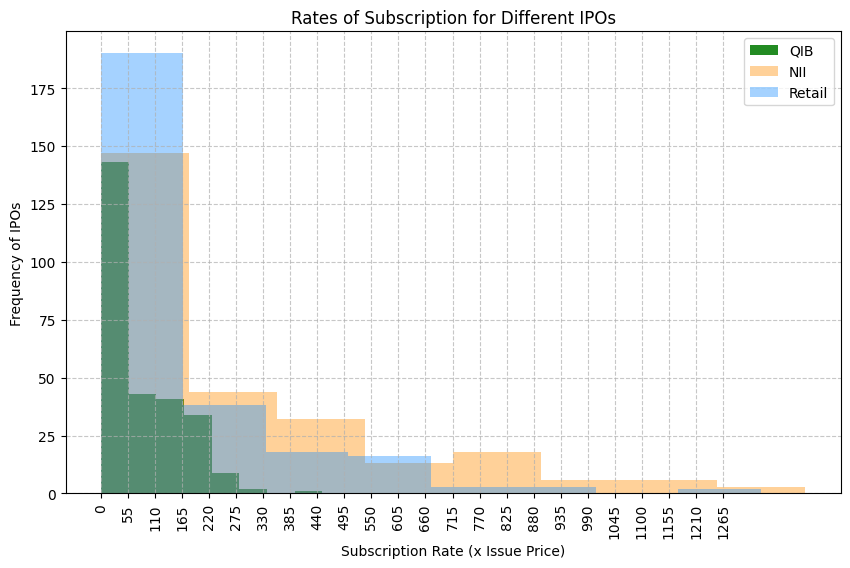

In [84]:
import matplotlib.pyplot as plt
import pandas as pd # Assuming df_merged is a pandas DataFrame

plt.figure(figsize=(10, 6)) # Optional: Adjust figure size for better readability

plt.hist(df_merged['QIB (x)'], color='forestgreen', alpha=1, label='QIB', bins=8)
plt.hist(df_merged['NII (x)'].loc[df_merged['NII (x)']<1500], color='darkorange', alpha=0.4, label='NII', bins=8)
plt.hist(df_merged['Retail (x)'].loc[df_merged['Retail (x)']<1500], color='dodgerblue', alpha=0.4, label='Retail', bins=8)
#plt.hist(df_merged['Total (x)'], color='cyan', alpha=0.6, label='Total', bins=10) # Uncomment if you want to include 'Total'
# alpha - transparency; 

plt.title("Rates of Subscription for Different IPOs")
plt.xlabel('Subscription Rate (x Issue Price)')
plt.ylabel("Frequency of IPOs")
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7) # Optional: Add a grid
#plt.xticks([0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300])
plt.xticks(ticks = np.arange(0,1300,55), rotation = 90)
plt.show()

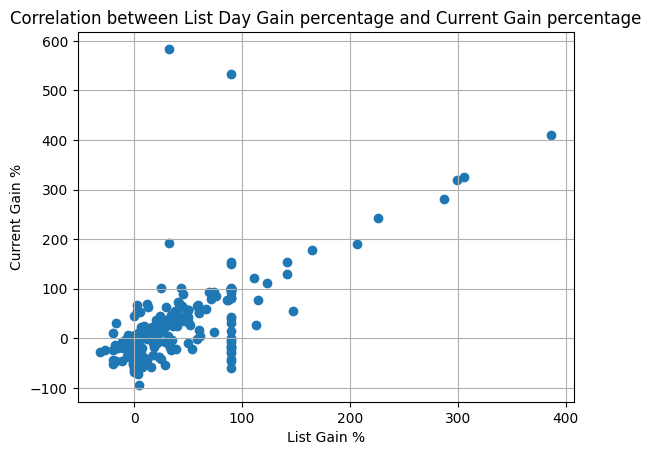

In [89]:
plt.scatter(df_merged['List Gain(%)'], df_merged['Current Gain(%)'])
plt.title('Correlation between List Day Gain percentage and Current Gain percentage')
plt.xlabel('List Gain %')
plt.ylabel('Current Gain %')
plt.grid()

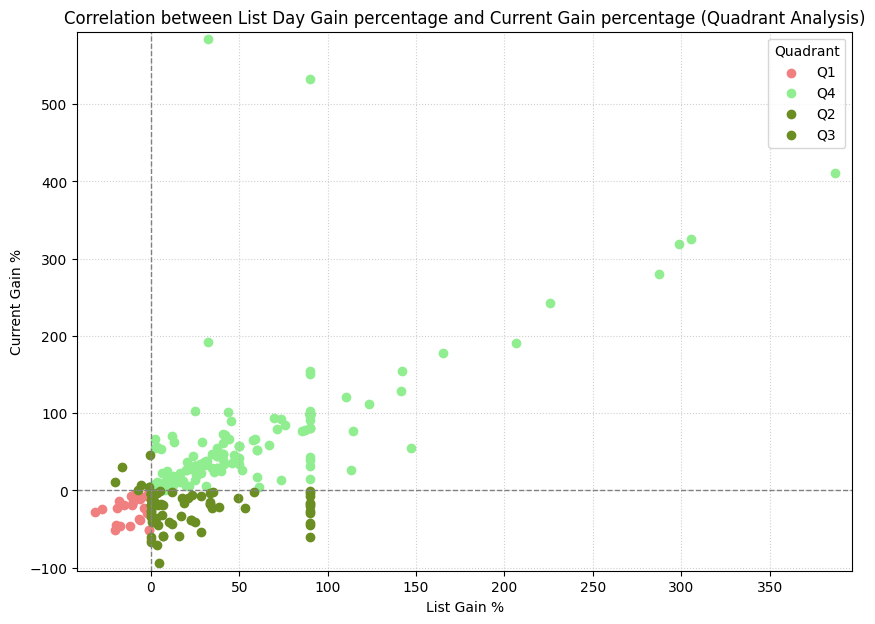

In [91]:
import matplotlib.pyplot as plt
import numpy as np
x = df_merged['List Gain(%)'].values
y = df_merged['Current Gain(%)'].values

# Filter out extreme outliers if generated
mask = (x > -100) & (x < 300) & (y > -100) & (y < 300)
# x = x[mask]
# y = y[mask]

# --- 2. Determine the center of the quadrants ---
# Based on the plot, the center seems to be around (0, 0) for these axes.
# You might need to adjust these if your data's true center is different.
center_x = 0
center_y = 0

# --- 3. Color code the points based on quadrants ---
quadrant1_x = [] # Top Right (x >= center_x, y >= center_y)
quadrant1_y = []
quadrant2_x = [] # Top Left (x < center_x, y >= center_y)
quadrant2_y = []
quadrant3_x = [] # Bottom Left (x < center_x, y < center_y)
quadrant3_y = []
quadrant4_x = [] # Bottom Right (x >= center_x, y < center_y)
quadrant4_y = []

for i in range(len(x)):
    if x[i] >= center_x and y[i] >= center_y:
        quadrant1_x.append(x[i])
        quadrant1_y.append(y[i])
    elif x[i] < center_x and y[i] >= center_y:
        quadrant2_x.append(x[i])
        quadrant2_y.append(y[i])
    elif x[i] < center_x and y[i] < center_y:
        quadrant3_x.append(x[i])
        quadrant3_y.append(y[i])
    else: # x[i] >= center_x and y[i] < center_y
        quadrant4_x.append(x[i])
        quadrant4_y.append(y[i])

# --- 4. Create the scatter plot with colored quadrants and legends ---
plt.figure(figsize=(10, 7))

# Plot each quadrant with its specified color
plt.scatter(quadrant3_x, quadrant3_y, color='lightcoral', label='Q1') # Light Red
plt.scatter(quadrant1_x, quadrant1_y, color='lightgreen', label='Q4')   # Green
plt.scatter(quadrant2_x, quadrant2_y, color='olivedrab', label='Q2')    # Pale mix of red and green (using salmon for a blend)
plt.scatter(quadrant4_x, quadrant4_y, color='olivedrab', label='Q3') # Pale mix of red and green (using olivedrab for a blend)

# Add horizontal and vertical lines to clearly define the quadrants
plt.axvline(center_x, color='gray', linestyle='--', linewidth=1)
plt.axhline(center_y, color='gray', linestyle='--', linewidth=1)

# Set labels and title
plt.xlabel('List Gain %')
plt.ylabel('Current Gain %')
plt.title('Correlation between List Day Gain percentage and Current Gain percentage (Quadrant Analysis)')

# Add a legend
plt.legend(title='Quadrant')

# Adjust plot limits to ensure all points and lines are visible
plt.xlim(min(x) - 10, max(x) + 10)
plt.ylim(min(y) - 10, max(y) + 10)

plt.grid(True, linestyle=':', alpha=0.6)
plt.show()